In [1]:
!pip install tensorflow matplotlib numpy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [3]:
# Vocabulary size (top words only)
max_features = 10000
maxlen = 200  # each review cut/padded to 200 words

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

# Pad sequences to fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 train sequences
25000 test sequences


In [4]:
# Vocabulary size (top words only)
max_features = 10000
maxlen = 200  # each review cut/padded to 200 words

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

# Pad sequences to fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


Loading data...
25000 train sequences
25000 test sequences


In [5]:
model = Sequential()
model.add(Embedding(max_features, 128))        # word embeddings
model.add(SimpleRNN(128, dropout=0.2))         # Simple RNN
model.add(Dense(1, activation='sigmoid'))      # output layer (binary)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 122ms/step - accuracy: 0.5578 - loss: 0.6781 - val_accuracy: 0.7846 - val_loss: 0.4895
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.7553 - loss: 0.5100 - val_accuracy: 0.7076 - val_loss: 0.5658
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.7990 - loss: 0.4455 - val_accuracy: 0.7635 - val_loss: 0.5210
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.8324 - loss: 0.3996 - val_accuracy: 0.7112 - val_loss: 0.5699
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 121ms/step - accuracy: 0.8216 - loss: 0.4216 - val_accuracy: 0.6588 - val_loss: 0.6136


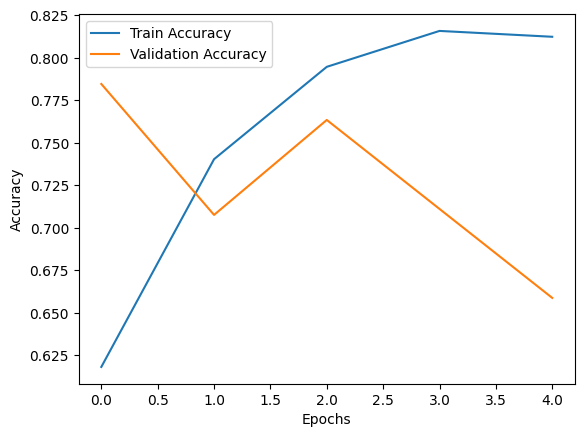

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
def predict_sentiment(review_text):
    # Tokenize the review text
    words = review_text.lower().split()
    encoded_review = []
    for word in words:
        if word in word_index and word_index[word] < max_features:
            encoded_review.append(word_index[word])
        else:
            encoded_review.append(2) # 'unknown' word index

    # Pad the sequence
    padded_review = sequence.pad_sequences([encoded_review], maxlen=maxlen)

    # Make prediction
    prediction = model.predict(padded_review)[0][0]

    # Interpret prediction
    if prediction >= 0.5:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'

    print(f"Review: '{review_text}'")
    print(f"Prediction: {prediction:.4f}")
    print(f"Sentiment: {sentiment}")

# Example usage:
user_review_positive = "This movie was absolutely fantastic! I loved every single moment of it. The acting was superb and the story was captivating."
predict_sentiment(user_review_positive)

user_review_negative = "What a terrible movie. I regret watching it. The plot was boring and the actors were dreadful."
predict_sentiment(user_review_negative)

user_review_neutral = "The movie was okay, nothing special. Some parts were good, others were not."
predict_sentiment(user_review_neutral)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Review: 'This movie was absolutely fantastic! I loved every single moment of it. The acting was superb and the story was captivating.'
Prediction: 0.6299
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Review: 'What a terrible movie. I regret watching it. The plot was boring and the actors were dreadful.'
Prediction: 0.6855
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Review: 'The movie was okay, nothing special. Some parts were good, others were not.'
Prediction: 0.6854
Sentiment: Positive
